In [1]:
import json
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

# --- 1. Define Paths ---
ANNOTATION_PATH = 'data/annotations/rumsey_train.json'
IMAGE_ROOT = 'data/images/'

# --- 2. Load the Annotation Data ---
try:
    with open(ANNOTATION_PATH, 'r') as f:
        train_data = json.load(f)

    print(f"✅ Loaded {len(train_data)} images for training.")
    print("-" * 30)

    # --- 3. Inspect a Single Image Record ---
    example_image_data = train_data[0]
    image_file = example_image_data['image']
    
    print(f"Example Image File Path from JSON: {image_file}")
    print(f"Number of Text Phrases (Groups): {len(example_image_data['groups'])}")
except FileNotFoundError:
    print(f"❌ ERROR: Annotation file not found at {ANNOTATION_PATH}. Check your data/annotations folder!")

✅ Loaded 200 images for training.
------------------------------
Example Image File Path from JSON: rumsey/train/6917075_h3_w7.png
Number of Text Phrases (Groups): 114


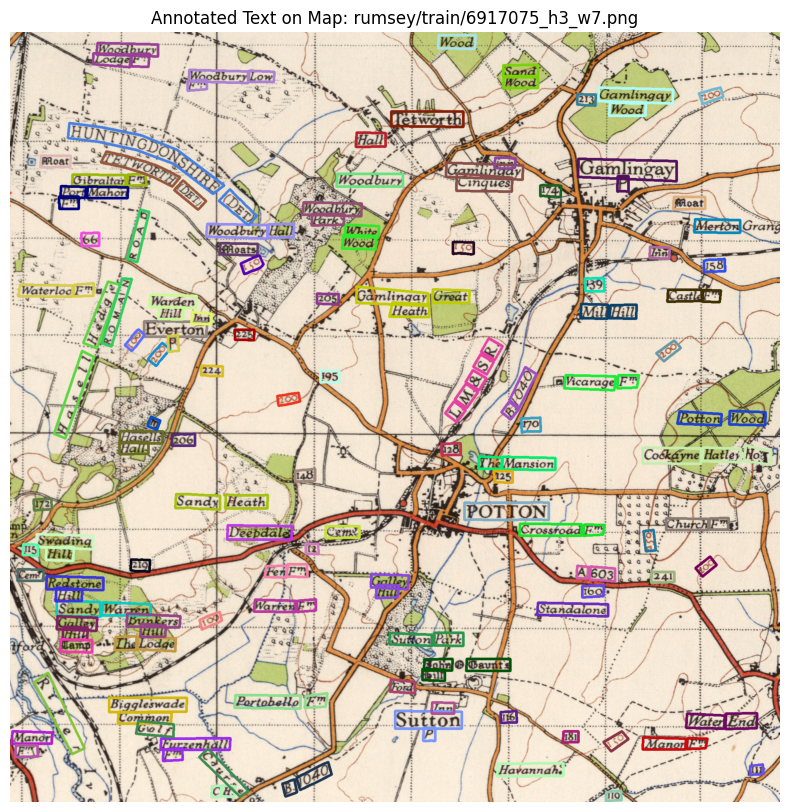

In [2]:
# --- 4. Function to Draw Polygons ---
def visualize_annotations(data_record, image_root):
    image_file = data_record['image']
    full_path = os.path.join(image_root, image_file) 

    # 4.2. Load the image
    img = cv2.imread(full_path)
    
    if img is None:
        print(f"❌ PATH ERROR: Could not load image. Check if image exists at: {full_path}")
        return

    # Convert BGR to RGB for correct plotting
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 4.3. Iterate over all groups (phrases)
    for word_list in data_record['groups']:
        color = np.random.randint(0, 255, 3).tolist()
        color = tuple(int(c) for c in color) 
        
        # 4.4. Iterate over all words in the phrase
        for word_data in word_list:
            if word_data.get('illegible') or word_data.get('truncated'):
                continue
                
            vertices = np.array(word_data['vertices'], dtype=np.int32)
            vertices = vertices.reshape((-1, 1, 2))
            
            # Draw the polygon boundary
            cv2.polylines(img, [vertices], isClosed=True, color=color, thickness=5)
            
    # 4.5. Display the annotated image
    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.title(f"Annotated Text on Map: {image_file}")
    plt.axis('off')
    plt.show()

# --- 5. Run Visualization on the Example Data ---
visualize_annotations(train_data[0], IMAGE_ROOT)